# Imports

In [652]:
import graphviz
import pandas as pd
import cufflinks as cf
import matplotlib.pyplot as plt

from sklearn import tree as t
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#Connect plotly and pandas
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Load data

In [653]:
cols = ["V" + str(i) for i in range(1,61)]
cols += ["Class"]
df = pd.read_csv("datasets/sonar.all-data.csv", names = cols)

# EDA

In [654]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [655]:
df.tail(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
198,0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,...,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060,M
199,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,M
200,0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,0.3193,...,0.0150,0.0076,0.0032,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085,M
201,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,...,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031,M
202,0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,0.3997,...,0.0091,0.0045,0.0043,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103,M
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [657]:
df.duplicated().sum()

0

In [658]:
X = df.drop(["Class"], axis=1)

# Split data

In [659]:
X_train, X_test, y_train, y_test = train_test_split(X, df["Class"], test_size=0.2, random_state=0)

# Basic Decision tree

## Initialize object

In [660]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree

DecisionTreeClassifier(random_state=0)

## Prediction

In [661]:
y_train_pred = tree.predict(X_train)
y_train_pred

array(['M', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R',
       'M', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R',
       'R', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M',
       'R', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M',
       'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M',
       'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'R',
       'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'R',
       'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'R',
       'R', 'R', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'M'], dtype=object)

In [662]:
y_test_pred = tree.predict(X_test)
y_test_pred

array(['R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R',
       'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'R'], dtype=object)

In [663]:
#y_test.sort_index()
y_test

12     R
80     R
33     R
5      R
187    M
83     R
116    M
122    M
90     R
154    M
45     R
156    M
52     R
189    M
96     R
86     R
204    M
37     R
66     R
18     R
170    M
15     R
7      R
55     R
92     R
134    M
125    M
124    M
158    M
184    M
75     R
149    M
138    M
71     R
186    M
145    M
176    M
118    M
16     R
135    M
190    M
22     R
Name: Class, dtype: object

In [664]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00        90
           R       1.00      1.00      1.00        76

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166



In [665]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           M       0.73      0.90      0.81        21
           R       0.88      0.67      0.76        21

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.80      0.79      0.78        42



# Save and Display tree image

In [666]:
dot_data = t.export_graphviz(tree, out_file = None,
                            feature_names = X_test.columns,
                            class_names = ["Metal","Rock"],
                            filled = True, rounded = True,
                            special_characters = True
                            )

In [667]:
graph = graphviz.Source(dot_data, filename = "tree_output", format = "png")

In [668]:
graph.render()

'tree_output.png'

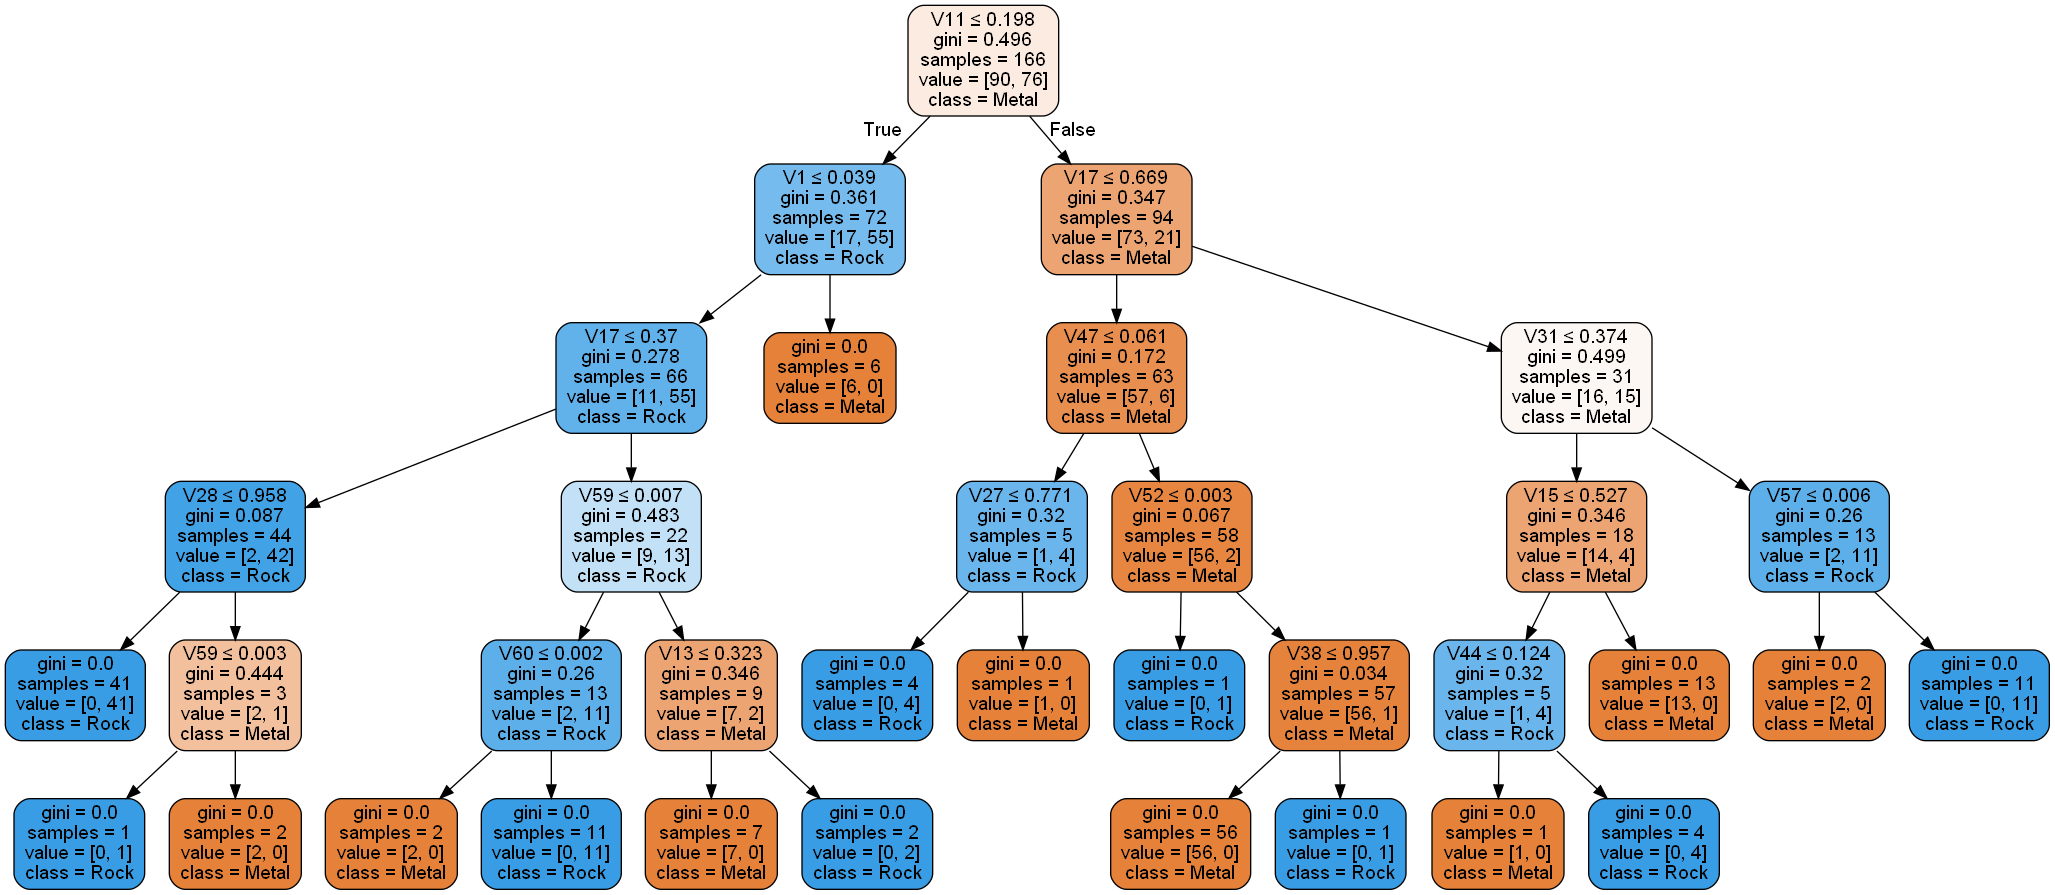

In [669]:
from IPython.core.display import Image, display
display(Image(filename='tree_output.png', width = 1200, height = 680))

# Pre-pruning

In [670]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [671]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

In [672]:
tree = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=tree,param_grid=params)
gcv.fit(X_train, y_train)
gcv

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [673]:
model = gcv.best_estimator_
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [674]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00        90
           R       1.00      1.00      1.00        76

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166



In [675]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           M       0.62      0.71      0.67        21
           R       0.67      0.57      0.62        21

    accuracy                           0.64        42
   macro avg       0.65      0.64      0.64        42
weighted avg       0.65      0.64      0.64        42



# Post-pruning (Cost Complexity Pruning)

In [676]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00803213 0.00963855 0.00963855 0.01163274 0.01496897
 0.01874163 0.02038925 0.02038925 0.02415489 0.02784471 0.03250045
 0.03540382 0.03780727 0.0460174  0.14349636]


In [677]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

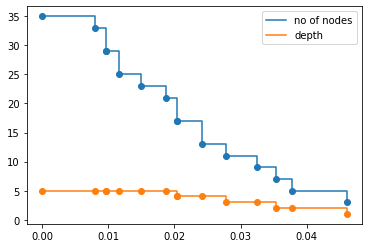

In [678]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

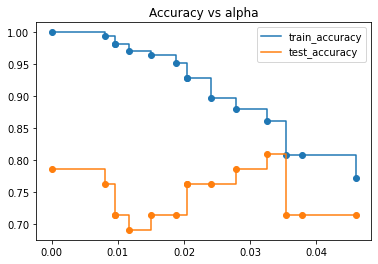

In [679]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# Check for skewed data

In [680]:
skewCols = df.skew()
skewedCols = skewCols[skewCols.ge(1) | skewCols.le(-1)]
skewedCols

V1     2.131088
V2     2.155644
V3     2.652518
V4     3.401697
V5     2.018141
V6     1.248166
V8     1.481107
V9     1.633870
V10    1.281258
V14    1.022369
V38    1.033366
V44    1.235086
V45    1.366839
V46    1.706674
V47    1.790155
V48    1.277722
V49    1.273385
V50    1.761714
V51    2.716060
V52    2.093976
V53    1.060572
V54    1.093090
V55    1.789946
V56    1.780805
V57    1.653090
V58    2.098330
V59    1.737506
V60    2.775754
dtype: float64

In [681]:
skewedColsList = skewedCols.index.tolist()
skewedColsList

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V8',
 'V9',
 'V10',
 'V14',
 'V38',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60']

In [682]:
len(skewedColsList)

28

In [683]:
X[skewedColsList[0:14]].iplot(kind='histogram',subplots=True,bins=50)

In [684]:
X[skewedColsList[14:29]].iplot(kind='histogram',subplots=True,bins=50)

In [685]:
df.Class.value_counts()

M    111
R     97
Name: Class, dtype: int64

# Normalize skewed classes

In [686]:
df[skewedColsList] = (df[skewedColsList]-df[skewedColsList].min())/(df[skewedColsList].max()-df[skewedColsList].min())

In [687]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.136431,0.156451,0.135677,0.035426,0.224956,0.237571,0.1539,0.340904,0.449282,0.285714,...,0.027104,0.155844,0.435673,0.149660,0.417949,0.502841,0.185355,0.245179,0.060046,R
1,0.323009,0.221603,0.272011,0.150024,0.283033,0.666756,0.2156,0.755458,0.483045,0.394537,...,0.108417,0.218182,0.111111,0.199546,0.479487,0.389205,0.105263,0.140496,0.087760,R
2,0.182153,0.246892,0.356110,0.243699,0.230028,0.585327,0.2431,0.819405,0.817859,0.869584,...,0.319544,0.418182,0.248538,0.394558,0.615385,0.889205,0.368421,0.258953,0.166282,R
3,0.062684,0.070724,0.199737,0.034950,0.034999,0.071486,0.1098,0.269239,0.077447,0.164593,...,0.161198,0.080519,0.409357,0.179138,0.176923,0.133523,0.093822,0.107438,0.256351,R
4,0.550885,0.282898,0.153088,0.079886,0.132640,0.147003,0.1209,0.531863,0.516659,0.621479,...,0.032810,0.127273,0.277778,0.235828,0.028205,0.196023,0.102975,0.292011,0.203233,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.126844,0.145735,0.050263,0.028293,0.082678,0.410642,0.2028,0.361411,0.333629,0.367653,...,0.154066,0.241558,0.552632,0.061224,0.248718,0.176136,0.256293,0.528926,0.348730,M
204,0.227139,0.040720,0.092970,0.120304,0.175755,0.230046,0.0990,0.212348,0.141419,0.291863,...,0.075606,0.228571,0.365497,0.129252,0.151282,0.088068,0.066362,0.168044,0.140878,M
205,0.373894,0.184741,0.054205,0.055635,0.072026,0.287288,0.1257,0.247630,0.175181,0.345488,...,0.216833,0.062338,0.119883,0.126984,0.217949,0.389205,0.308924,0.209366,0.057737,M
206,0.212389,0.148736,0.156045,0.130766,0.025361,0.336469,0.1465,0.235502,0.276914,0.320463,...,0.111270,0.106494,0.339181,0.068027,0.079487,0.088068,0.173913,0.096419,0.096998,M


In [688]:
df[skewedColsList[0:14]].iplot(kind='histogram',subplots=True,bins=50)

In [689]:
df[skewedColsList[14:29]].iplot(kind='histogram',subplots=True,bins=50)

In [690]:
skewCols = df.skew()
skewCols
skewedCols = skewCols[skewCols.ge(1) | skewCols.le(-1)]
skewedCols

V1     2.131088
V2     2.155644
V3     2.652518
V4     3.401697
V5     2.018141
V6     1.248166
V8     1.481107
V9     1.633870
V10    1.281258
V14    1.022369
V38    1.033366
V44    1.235086
V45    1.366839
V46    1.706674
V47    1.790155
V48    1.277722
V49    1.273385
V50    1.761714
V51    2.716060
V52    2.093976
V53    1.060572
V54    1.093090
V55    1.789946
V56    1.780805
V57    1.653090
V58    2.098330
V59    1.737506
V60    2.775754
dtype: float64

# Decision Tree with Normalized Data

[0.         0.00803213 0.00963855 0.00963855 0.01163274 0.01496897
 0.01874163 0.02038925 0.02038925 0.02415489 0.02784471 0.03250045
 0.03540382 0.03780727 0.0460174  0.14349636]


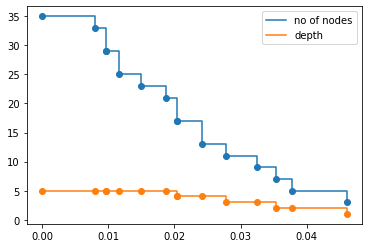

In [691]:
X_train, X_test, y_train, y_test = train_test_split(X, df["Class"], test_size=0.2, random_state=0)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

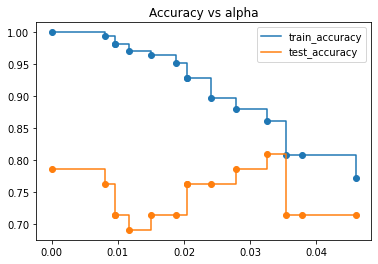

In [692]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can see as Decision Trees, unlike Parametric Methods, are not affected by skewed classes